# 5.2 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

소규모 데이터셋
- 보통 수백개에서 수만개의 데이터 수를 소규모 데이터셋이라고 함
- 컴퓨터 비전 작업에서는 소규모 데이터셋을 사용하는 경우가 흔함


### 소규모 데이터 셋을 이용한 컴퓨터 비전 이미지 분류 문제 수행 방법 3가지
1. 보유한 소규모 데이터셋을 사용해 처음부터 새로운 모델을 훈련하기(5.2절)
    - 작은 convnet을 regularization을 사용하지 않고 훈련해 기본 성능 모델 만들기
        - Overfitting이 주요 이슈
    - **Data Augmentation**을 이용해 성능 높이기
    

2. **사전 훈련된 네트워크에서 특성 추출하기**(5.3절)
3. **사전 훈련된 네트워크를 세밀하게 튜닝하기**(5.3절)

## 5.2.1 작은 데이터셋 문제에서 딥러닝의 타당성

### 데이터의 수

- 많은 데이터가 의미하는 것은 상대적이며 특히 **훈련하려는 네트워크의 크기와 깊이에 상대적**임
- 복잡한 문제를 푸는 컨브넷을 수십개의 샘플만 사용해서 훈련하는 것은 불가능
- **모델이 작고 regularization이 잘 되어 있으며 간단한 작업이라면 수백개의 샘플로도 충분할 수 있음**


### 딥러닝 모델의 재사용
- **대규모 데이터셋에서 훈련시킨 모델을 조금만 변경해서 완전히 다른 문제에 재사용 할 수 있음**
- 특히 컴퓨터 비전에서는 사전 훈련된 모델들이 많이 공개되어 있으므로 매우 적은 데이터에서 강력한 비전 모델을 만드는데 사용할 수 있음

## 5.2.2 데이터 내려받기

Kaggle의 Dogs vs. Cats dataset 사용
- https://www.kaggle.com/c/dogs-vs-cats/data
- 총 25000개의 데이터(강아지 12500개, 고양이 12500개)가 있음


사용할 데이터 수
- 총 2000개의 training set(class별 1000개)
- 총 1000개의 validation set(class별 500개)
- 총 1000개의 test set(class별 500개)

In [1]:
# 데이터셋 디렉토리 만들기

import os, shutil

dataset_origin = './datasets/cats_and_dogs/origin'

base_dir = './datasets/cats_and_dogs/small'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

save_dir = os.path.join(base_dir, 'saved_models')


if not os.path.isdir(save_dir) :
    os.mkdir(save_dir)

if not os.path.isdir(base_dir) :
    os.mkdir(base_dir)
    
if not os.path.isdir(train_dir) :
    os.mkdir(train_dir)
    
if not os.path.isdir(val_dir) :
    os.mkdir(val_dir)
    
if not os.path.isdir(test_dir) :
    os.mkdir(test_dir)

if not os.path.isdir(train_cats_dir) :
    os.mkdir(train_cats_dir)
    
if not os.path.isdir(train_dogs_dir) :
    os.mkdir(train_dogs_dir)
    
if not os.path.isdir(val_cats_dir) :
    os.mkdir(val_cats_dir)
    
if not os.path.isdir(val_dogs_dir) :
    os.mkdir(val_dogs_dir)
    
if not os.path.isdir(test_cats_dir) :
    os.mkdir(test_cats_dir)
    
if not os.path.isdir(test_dogs_dir) :
    os.mkdir(test_dogs_dir)

In [2]:
# 데이터 복사 

imgs = ["cat.{0}.jpg".format(i) for i in range(1000)]
for img in imgs:
    src = os.path.join(dataset_origin, img)
    dst = os.path.join(train_cats_dir, img)
    shutil.copy(src, dst)
    
imgs = ["cat.{0}.jpg".format(i) for i in range(1000, 1500)]
for img in imgs:
    src = os.path.join(dataset_origin, img)
    dst = os.path.join(val_cats_dir, img)
    shutil.copy(src, dst)
    
imgs = ["cat.{0}.jpg".format(i) for i in range(1500, 2000)]
for img in imgs:
    src = os.path.join(dataset_origin, img)
    dst = os.path.join(test_cats_dir, img)
    shutil.copy(src, dst)
    

imgs = ["dog.{0}.jpg".format(i) for i in range(1000)]
for img in imgs:
    src = os.path.join(dataset_origin, img)
    dst = os.path.join(train_dogs_dir, img)
    shutil.copy(src, dst)
    
imgs = ["dog.{0}.jpg".format(i) for i in range(1000, 1500)]
for img in imgs:
    src = os.path.join(dataset_origin, img)
    dst = os.path.join(val_dogs_dir, img)
    shutil.copy(src, dst)
    
imgs = ["dog.{0}.jpg".format(i) for i in range(1500, 2000)]
for img in imgs:
    src = os.path.join(dataset_origin, img)
    dst = os.path.join(test_dogs_dir, img)
    shutil.copy(src, dst)
    
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(val_cats_dir)))
print(len(os.listdir(val_dogs_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

1000
1000
500
500
500
500


## 5.2.3 네트워크 구성하기

일반적인 구조의 간단한 Convnet을 만듦
- Conv2D, MaxPooling2D를 번갈아 쌓은 구조
- relu activation 사용
- feature map의 깊이는 점차 깊어짐
- feature map의 크기는 점차 감소

MNIST보다 이미지가 크고 복잡한 문제이므로 네트워크를 조금 더 크게 만듦
- Conv2D, MaxPooling2D을 하나씩 더 추가
    - Network의 용량은 증가
    - Flatten 후의 feature map 크기 감소


In [3]:
# Convnet

from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 5.2.4 데이터 전처리

데이터 전처리 과정
1. 사진 파일 읽기
2. jpeg 콘텐츠를 RGB 픽셀 값으로 디코딩
3. float type의 텐서로 변환
4. 픽셀 값(0\~255)을 0\~1 사이로 조정

위 4가지 과정을 아래의 케라스의 도구들을 사용해 구현
- `keras.preprocessing.image`
    - 이미지 처리를 위한 helper 도구
    
    
- `ImageDataGenerator` 클래스
    - 디스크의 이미지 파일을 전처리된 배치 텐서로 바꾸어주는 파이썬 generator를 만들어 줌
    - iterator와 generator는 전체 항목을 미리 만들지 않으므로 메모리에 효율적
    
- `fit_generator()`
    - `fit()`과 동일하지만 generator를 사용할 수 있음
    - `steps_per_epoch` 매개변수
        - 하나의 epoch당 뽑을 batch 수
        - 한 epoch마다 `steps_per_epoch`개의 batch만큼 뽑은 후 `steps_per_epoch` 횟수 만큼 경사하강법 단계를 실행
    - `validation_data` 매개변수
        - 검증 데이터를 generator로 전달
        - `steps_per_epoch`마찬가지로 `validation_steps` 매개변수를 통해 하나의 epoch당 뽑을 검증 데이터의 batch 수 지정

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# ImageDataGenerator.flow_from_directory()에 전달된 매개변수 설명
# train_dir : target 디렉토리, 각 클래스 이름으로 된 디렉토리들이 있음
# target_size=(150, 150) : 이미지를 150x150 크기로 바꿈
# class_mode : 이진분류 - 'binary'
#              다중분류(one-hot encoding) - 'categorical'
#              다중분류(정수 레이블) - 'sparse'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

    
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, # 1epoch당 100번의 batch : 1epoch당 총 20*100 = 2000개
    epochs=30,
    validation_data=val_generator,
    validation_steps=50 # 1epoch당 50번의 batch : 1epoch당 총 20*50 = 2000개
)

Epoch 1/30
100/100 [==============================] - 6s 56ms/step - loss: 0.6879 - acc: 0.5520 - val_loss: 0.6704 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 5s 45ms/step - loss: 0.6720 - acc: 0.5890 - val_loss: 0.6562 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 5s 45ms/step - loss: 0.6313 - acc: 0.6520 - val_loss: 0.5259 - val_acc: 0.6020
Epoch 4/30
100/100 [==============================] - 5s 45ms/step - loss: 0.5837 - acc: 0.6935 - val_loss: 0.6479 - val_acc: 0.6640
Epoch 5/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5468 - acc: 0.7135 - val_loss: 0.6660 - val_acc: 0.6450
Epoch 6/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5219 - acc: 0.7330 - val_loss: 0.5068 - val_acc: 0.7180
Epoch 7/30
100/100 [==============================] - 5s 47ms/step - loss: 0.4831 - acc: 0.7630 - val_loss: 0.5308 - val_acc: 0.7180
Epoch 8/30
100/100 [==============================] - 5s 46ms/step - 

In [7]:
model.save(os.path.join(save_dir, 'cats_and_dogs_small_1.h5'))

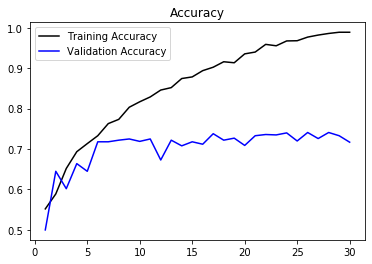

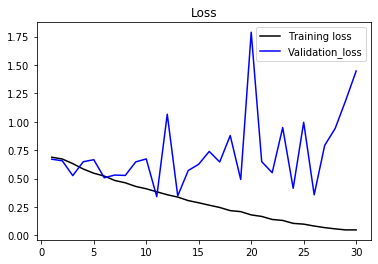

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'k', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'k', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Loss')
plt.legend()

plt.show()

**결과 분석**
- Overfitting이 일어남
    - 훈련 샘플의 수가 적어서 Overfitting이 가장 중요한 문제
